In [12]:
# Imports 

import math
import random
import matplotlib.pyplot as plt

In [4]:
# Config 

rho_max = 0.2
tp_max = 14
tp_min = 2
N = 60
p = 60

BW = 125
PL = 30
CR = 1

TP_SET = [2,5,8,11,14]
SF_SET = [7,8,9,10,11,12]
CH_SET = ['868.1','868.3','868.5']

In [12]:
def toa (sf, cr, pl, bw):
        H = 0  # implicit header disabled (H=0) or not (H=1)
        DE = 0  # low data rate optimization enabled (=1) or not (=0)
        Npream = 8  # number of preamble symbol (12.25  from Utz paper)

        if bw == 125 and sf in [11, 12]:
            # low data rate optimization mandated for BW125 with SF11 and SF12
            DE = 1
        if sf == 6:
            # can only have implicit header with SF6
            H = 1
        Tsym = (2.0 ** sf) / bw  # msec
        Tpream = (Npream + 4.25) * Tsym
        # print "sf", sf, " cr", cr, "pl", pl, "bw", bw
        payloadSymbNB = 8 + max(
            math.ceil((8.0 * pl - 4.0 * sf + 28 + 16 - 20 * H) / (4.0 * (sf - 2 * DE)))
            * (cr + 4),
            0,
        )
        Tpayload = payloadSymbNB * Tsym
        return (Tpream + Tpayload) / 1000.0  # in seconds

def rho_compute(sf,n) : 
    return (toa(sf,CR,PL,BW)*n)/p

def reward_function(rho,u_ch,tp):
    return (rho_max)/(rho*u_ch) + ((tp_max - tp)/(tp_max-tp_min))


In [15]:
rewards = []
tx = 14
for sf in SF_SET:
    rho = rho_compute(sf,10)
    rewards.append(reward_function(rho,20,tx))
    if tx >= 5:
        tx = tx -3
    else:
        tx = 2
print(rewards)

[0.8340747330960854, 0.7362551867219918, 0.7651300904977376, 0.8825650452488688, 1.0662825226244343, 1.0364388992537314]


In [ ]:
def action_space_generator():
    action_space = []
    for sf in SF_SET:
        for tp in TP_SET:
            for ch in CH_SET:
                action_space.append([sf,tp,ch])
    return action_space 

In [73]:
import gym
import numpy as np
env = gym.make('Taxi-v3')

# Observation and action space 
obs_space = env.observation_space
action_space = env.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))

P = {
        state: {action: [] for action in range(action_space.n)}
        for state in range(obs_space.n)
    }
#print(P)

The observation space: Discrete(500)
The action space: Discrete(6)


In [95]:
from gym import spaces
action_space = spaces.Box( np.array([7,2,0]), np.array([12,14,2]),dtype =np.int)
print(action_space.sample())
print(action_space.shape)


11
(3,)


In [83]:
import gym
from gym import spaces
N = 100

class LoraWANEnv (gym.Env):
    
    def __init__(self):
        self.action_space = spaces.Box(np.array([7,2,0]), np.array([12,14,2]),dtype =np.int)
        self.observation_space = spaces.Box(np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]), np.array([N,N,N,N,N,N,N,N,N,N,N,N,N,N]),dtype =np.int)
    
    
    def toa (self,sf, cr, pl, bw):
        H = 0  # implicit header disabled (H=0) or not (H=1)
        DE = 0  # low data rate optimization enabled (=1) or not (=0)
        Npream = 8  # number of preamble symbol (12.25  from Utz paper)

        if bw == 125 and sf in [11, 12]:
            # low data rate optimization mandated for BW125 with SF11 and SF12
            DE = 1
        if sf == 6:
            # can only have implicit header with SF6
            H = 1
        Tsym = (2.0 ** sf) / bw  # msec
        Tpream = (Npream + 4.25) * Tsym
        # print "sf", sf, " cr", cr, "pl", pl, "bw", bw
        payloadSymbNB = 8 + max(
            math.ceil((8.0 * pl - 4.0 * sf + 28 + 16 - 20 * H) / (4.0 * (sf - 2 * DE)))
            * (cr + 4),
            0,
        )
        Tpayload = payloadSymbNB * Tsym
        return (Tpream + Tpayload) / 1000.0  # in seconds


    def rho_compute(self,sf,n) : 
        return (self.toa(sf,CR,PL,BW)*n)/p

    def reward_function(self,rho,u_ch,tp):
        return (rho_max)/(rho*u_ch) + ((tp_max - tp)/(tp_max-tp_min))
    
    def reset(self):
        pass
    
    def step(self, action):
        assert self.action_space.contains(action)
        
        return observation, reward, done, info
    
    def render(self):
        pass
    
    def close(self):
        pass
        

env =LoraWANEnv()
print(env.observation_space.shape)
print(env.action_space.sample())
print(type(env.observation_space))



(14,)
[ 7 14  2]
<class 'gym.spaces.box.Box'>


In [19]:
action_space = spaces.Box( low=5,high =10, shape =(5,),dtype =np.int)
print(action_space.sample())


[7 8 5 5 8]


In [1]:
from gym import spaces
space = spaces.Tuple((
  spaces.Discrete(5),
  spaces.Discrete(4),
  spaces.Box(low=0, high=1, shape=(2, 2))))
print(space.sample())
print(space.shape)

(0, 2, array([[0.40701246, 0.01831591],
       [0.63941157, 0.9320467 ]], dtype=float32))
None


In [5]:
def reward_plot(rewards):
    plt.plot(rewards) 
    plt.show()



In [5]:
rewards = [71.930546851005, 59.49383308079349, 67.43589861431441, 60.614995062683064, 59.18535498635602, 58.77294409279129, 61.10061994227983, 57.26791248749176, 55.848272384853466, 50.84118613264099, 59.999066159392555, 58.805417115243245, 72.75128549293764, 67.52791799905924, 52.56139453991911, 55.815344748682136, 70.73318858359283, 56.23373844482128, 61.581781610899554, 57.27277320684334, 54.00928558930313, 50.89900702991427, 63.19622650033104, 56.32603277588835, 57.09775731328877, 53.032302623942286, 62.4054536657725, 49.59351932850882, 47.563380907047936, 47.54501532785921, 44.014642108533096, 44.13485370405868, 54.884315928169464, 47.41066832367264, 44.36129941078698, 47.61230293886052, 42.87481899649825, 46.8738731827977, 36.03129574718212, 46.99988820646764, 42.21497347488039, 45.90237293857377, 58.29632518348316, 44.78707648245005, 43.4662017129244, 47.902490987797364, 35.34186267285164, 39.226782392013284, 24.068531895729755, 38.99505179439209, 41.236718440125195, 33.184486033014835, 46.07650026794135, 35.647900013763795, 41.07072822593484, 39.25497468750705, 35.475170403552575, 50.496313054999376, 36.29838814878177, 35.025417479318776, 38.25562291749173, 32.65570324689929, 38.570452299923645, 40.84217500209744, 55.05902440308139, 36.970404212721135, 38.36517243263322, 28.977289839608403, 24.37062678994635, 35.63858805484875, 33.314921575991924, 43.90130785562952, 36.20756778937641, 41.79041207985293, 29.151974183077563, 24.605646793800876, 37.439207639818484, 36.08335656368345, 28.835398096065795, 32.894288522314135, 30.370718029502317, 28.79615651510504, 25.502500061255926, 33.916407808383646, 27.7968243116973, 39.629065874699656, 26.563512748878264, 29.37356467344657, 29.308599838207563, 29.817644777357604, 30.511700364381383, 33.15056538620637, 25.988698661333252, 23.5646792738955, 29.742768177706125, 25.020843662748593, 31.062768118763458, 25.343677008777348, 26.24677993527178, 27.048474355122444, 25.803379014731952, 35.122600580945026, 27.101542145169713, 20.658488684510907, 32.57386138466809, 24.29149097424902, 23.802517679535725, 17.126328664118834, 31.65418359623582, 22.457665133441797, 30.691236909824426, 21.29091069177511, 27.092276955256853, 20.832329000101602, 32.51885012382241, 20.274785879668933, 20.701350757895312, 31.235036713736502, 20.881298497288284, 34.87761947752715, 24.16006980741363, 22.15076012778179, 26.776177718489972, 16.210777709029355, 19.963891330987458, 18.90176530732977, 26.01315704678143, 20.59318779275527, 18.0484572385535, 22.11633518115903, 21.294080990036427, 22.316915636061633, 13.77365871091704, 24.160065273876103, 11.816393919632851, 16.490771115493132, 20.40122624547123, 18.072224110594924, 22.216393227545346, 24.362924680452334, 17.777776363835873, 21.72904445075841, 17.665570361295888, 22.45488475506866, 20.563059143115797, 19.567894801569473, 19.853902178518364, 13.126861929816597, 14.881123904852611, 20.33461846654971, 26.229297632024704, 14.556291751870187, 14.712859001325063, 11.744028805427341, 18.479543835396075, 25.780160707547303, 16.334225078045268, 13.667688730552532, 15.008908866087845, 11.542161257203835, 16.621065641885586, 12.957672890294752, 14.392673772053673, 9.091943828590958, 19.998137783954792, 11.169281977399363, 16.558002059242263, 18.262917388460718, 15.277286937380282, 12.829757449395018, 20.67407954784141, 11.724290638806906, 15.807550574153986, 10.292956899109567, 16.67262243672429, 12.812127667010632, 14.673724746268883, 12.70536579141736, 14.951766482745622, 7.721835909338622, 16.914492672325572, 12.242831706854368, 12.288999384730552, 15.122991077542586, 15.647737598283616, 12.443701713563842, 12.715392782107447, 8.206543198634913, 9.348557803315204, 15.818974229787077, 12.643888335668409, 13.292491070585502, 10.398185418611474, 12.290544394555447, 7.051169808638574, 6.848118270351634, 10.453201028905948, 11.702712283088427, 15.53824419104183, 9.137846019443671, 20.83894764521822, 8.579825795456108, 12.975040591816914, 9.90424260102358, 12.738238137445414, 9.492598274861571, 9.354834938216921, 7.411996159084157, 11.104540252393644, 16.1559909282044, 10.616591693345269, 8.790793401452532, 9.047669006078848, 6.771103146106371, 15.318584098868094, 14.704239031173435, 8.461343430524472, 12.868424411988215, 8.72762443545847, 12.004046002843848, 14.798875356995364, 12.394852493708715, 10.330693576410809, 7.474531207232432, 13.33506443449682, 9.452264398482441, 11.839640447819669, 10.09339138127676, 10.281862866157171, 11.527819026326226, 8.305647587998006, 12.563924569720458, 8.382903116307531, 16.751336531119108, 8.71400527047865, 12.152492771139993, 12.686848040435319, 10.888941997335822, 15.088937296062202, 9.982786190121965, 11.190896717946176, 7.389576631091692, 12.649821090122483, 16.183590085195387, 10.309769919460411, 11.442857210345014, 11.855605310165567, 15.404783574464174, 9.073809794932382, 8.453449309201696, 11.13624071173839, 9.160295102457974, 12.750303123665052, 12.327010199252202, 9.764470942501259, 6.127891363062425, 17.03019595359491, 10.669602026398037, 9.832516376067282, 8.849814754428577, 10.939094376961638, 13.416062401283142, 4.111350587637787, 10.339373541833648, 8.059311174893296, 7.886011721104717, 8.298089826016033, 6.725791893053923, 8.43424154962631, 14.183048452414324, 7.264239148733733, 10.530720306144113, 6.16112076986355, 7.584546926984741, 8.1586690551013, 11.836381168863145, 7.56019400334949, 5.2204941042624, 8.411500232543789, 6.399685074397455, 12.679639171588324, 8.922929375476691, 13.115639810325652, 9.808968727456346, 8.80359179256675, 10.333757333029718, 12.53300797157198, 10.768434457672555, 15.291657008281973, 9.829715219602267, 12.125089872519183, 8.064134902765725, 8.208849239447988, 8.796578155082402, 11.751195501113278, 12.796290901402461, 8.352451962192415, 13.215282657057545, 10.960952322876356, 10.941628662284943]

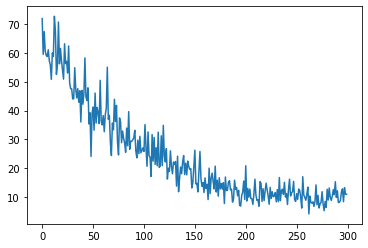

In [6]:
reward_plot(rewards)

In [7]:
rewards2 = [57.80349762275458, 61.461659338044115, 60.593202158087095, 63.96547453236482, 71.8265226994146, 65.65961801208698, 72.97965510526345, 52.686904038858586, 64.20981103552603, 57.78114106328493, 55.871883422523695, 74.51430226492366, 45.11503888560542, 58.408306962443106, 66.32294981978146, 55.646199594605775, 52.81810264650316, 54.619523380785644, 50.77004061957122, 54.86628532454782, 71.49013773329324, 67.5146081072258, 52.55541500138608, 57.99431109830996, 55.603122216071434, 62.732608779258626, 59.58501718853718, 48.69980063777615, 52.182748026552126, 61.6663302622026, 52.273522663211025, 58.722156623533984, 50.0123880625478, 51.62925836961715, 62.46797952342934, 48.6402863258727, 55.54814600668428, 55.02221507690258, 54.99824704435995, 55.07840844037964, 54.73947867631828, 51.687365937629025, 51.29645281699945, 54.72716260389421, 56.400568888483065, 64.13871800152944, 55.26096781785088, 40.34966078952821, 59.38617874061521, 48.16004935015112, 63.403884972903285, 60.700625790894165, 46.232838057669575, 50.52656399817132, 54.92047756733305, 37.46067123116434, 44.35722817942828, 48.708018596797835, 48.71076929219439, 45.636810685332144, 46.29847314283984, 38.19314072680656, 44.0014423158688, 47.52163455028055, 40.992249021734835, 54.974361614298836, 47.535149237256995, 37.56909382528872, 44.5541978484487, 45.51747296772673, 43.37465085110438, 46.947056318359486, 41.54866564032658, 48.77716576578171, 44.1046677553062, 50.74877329803458, 44.443830591973054, 45.01821697441171, 50.580210281377084, 38.03449057934919, 45.71986985360759, 47.41576434211562, 51.61646464020493, 38.62264580422523, 41.2537579139811, 39.715266322737776, 44.13356862377342, 45.18797218312114, 48.08837751578487, 44.166206215161836, 47.16856309908001, 42.47153601433113, 38.92282035876125, 53.50408414293501, 44.9703334731426, 41.599190800016956, 43.48588365567718, 40.16991414631757, 47.9829054715108, 33.75581007398233, 39.05656252913845, 43.404353642213486, 41.10817147855199, 46.53065236399099, 36.196426265262765, 36.47552752943392, 46.23357305055768, 42.93709451370992, 39.23974890355229, 43.76896975849831, 41.040478865787364, 33.75694154745454, 43.3395506074638, 40.27640167975008, 38.27497126672622, 41.66010032748375, 49.00536292212986, 34.03268675096616, 39.23770369098157, 40.12232167709445, 37.32428561265798, 42.36864384981583, 44.38957241527102, 38.358214169296176, 49.34224446916214, 36.29384678354951, 38.333574831149555, 35.54086334186184, 31.54688561490473, 37.21162847114143, 45.484136258553505, 43.171113767109006, 39.28742863874723, 39.62352979890114, 36.81242863554787, 32.969838715506896, 36.83753789978581, 36.04671426538235, 40.07239711896779, 31.206402720421657, 33.098093973835695, 40.11943200316947, 40.88472266045367, 40.30590425977452, 33.86966480070359, 36.758184776596195, 42.5097728625246, 38.43871081284683, 37.03756001968667, 29.2024030906381, 37.01208274451915, 32.74714210758322, 34.38189419759141, 39.08042387320757, 37.46356003600438, 34.61955457279424, 35.49336044821014, 34.07973077430497, 37.294721549578675, 37.909740795900895, 38.36892734785817, 32.53435276008201, 34.964560264704275, 41.898040025536766, 30.92441247907848, 29.530145299706362, 35.79998646942906, 32.74480684308086, 40.44291730833325, 40.11383052169228, 32.10898937966205, 34.31832662545377, 29.434943802916518, 34.69146121620518, 39.17248249199672, 32.35708216140922, 31.989670693595606, 29.550805376015795, 32.38318579678323, 32.88912613737073, 33.19243636679328, 37.90246772159134, 34.61900816481675, 29.732567839727675, 30.71945582259486, 36.4104695606705, 32.42953390815523, 34.744985720287495, 36.7934438244939, 33.22427779567403, 33.3048388318613, 37.38560343969534, 27.991669509702135, 30.127095606060305, 27.433324116650084, 27.18349147467004, 32.615886749415594, 30.672859481199158, 38.10038236328681, 30.24363337515915, 30.179779719621504, 29.609482333033508, 30.384246610944686, 30.30269885243443, 33.64294392773303, 37.672637471417396, 33.863821310892625, 30.67731649132883, 36.202534161349895, 38.32113862798134, 33.32800968870192, 33.87337063333217, 32.58937624034769, 32.317215825343496, 34.444621650292326, 32.99581234824941, 35.34102222302849, 32.73032279246882, 33.30717560812187, 31.818278200226867, 35.722173692443235, 34.48306686909621, 34.74568486412109, 31.169001315249613, 32.908077130443544, 34.83831075361312, 29.27932975261178, 34.8734666386912, 27.924297588667656, 27.8428544255633, 32.063288270755535, 32.110315907483844, 32.06681106553502, 34.240474125320404, 31.307442615665632, 29.158895809626465, 32.83623824005852, 33.228994548507394, 31.429338133967633, 27.84382662794366, 28.90517893274648, 26.77138337532203, 29.328548429261605, 30.95806508778007, 29.31350295678118, 30.730982629952216, 28.72454313390746, 31.94838031499058, 28.582008959945306, 30.104169796038292, 29.482844694655693, 27.16977471727348, 29.78251974813786, 26.502007396551363, 28.604101349400203, 34.61426625403881, 28.535212072793218, 30.53819785517306, 31.494668087439862, 34.6673306031675, 29.62264615294945, 29.51558934724389, 26.59704881452728, 29.80226660108088, 30.80409294033296, 33.265986678738784, 28.469278928824995, 31.152091073942394, 27.754196885543518, 29.86517508590601, 33.25110369459166, 29.196024982856134, 29.9407595585153, 29.480998095883937, 28.55951017921393, 26.609222839362687, 32.20127478853223, 30.703228846574532, 28.48549791253622, 29.60428191707349, 30.4797529332644, 27.17275576745416, 32.391188992482554, 27.230795329621223, 30.82020326088645, 29.405720246912836, 30.8309633741381, 31.993780548206182, 29.523580737546137, 31.623403379791014, 31.227324174106293, 34.169989463038206, 30.989694884771296, 31.94580898974022, 30.325892751331036, 32.484147862728854, 33.612725941661964, 33.737976877147986, 33.13145163681999, 31.69210231160787]

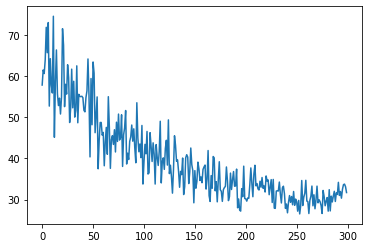

In [8]:
reward_plot(rewards2)

In [9]:
reward_10 = [1048.3314004197657, 1785.3304067548859, 2117.212119951192, 1574.395340894694, 1447.6101969287488, 1916.0008016861923, 2286.719754365024, 1786.6508044019672, 1847.3940978772441, 1662.172365200479, 1398.2358045787423, 1723.0013949518404, 2214.4688896509806, 1434.00313798742, 2034.3941098973794, 1723.8071741895628, 1734.284445803788, 1326.7096814816314, 1797.2033101537158, 1604.3771699790036, 1277.9582768069704, 1585.543626007249, 1386.6964109946878, 1205.646646236074, 1829.7367989992915, 1847.6541454226688, 1304.8762707030808, 1369.7161006652634, 1546.9105042061003, 1239.671796624933, 1841.5325395353607, 1002.9489504274359, 1429.8348907867462, 1533.945369391803, 1558.0615238450598, 1613.8122333137424, 1237.0360671211934, 1758.5406106141832, 1541.2195173132425, 1073.79202892726, 1599.423105033208, 1751.7012174419954, 1524.5165961195073, 1671.0193695770063, 1572.9482747136785, 1531.3414997476775, 1042.5291411932271, 1864.3356045302837, 1897.608742863952, 1601.4196495651183, 1220.892540875118, 1150.052263988308, 690.572242487149, 1231.2095401670115, 925.0530464868681, 1283.9847523017052, 1806.657214449576, 1625.6182790151902, 1068.6640036643664, 1293.5717979932267, 1090.2024276383327, 1312.996162035616, 1343.1904707134445, 1552.240679971385, 1463.0803713322737, 1576.45641310002, 1131.1629145149934, 907.562288855065, 1036.3208264318241, 1465.7923951086273, 1475.2438418414577, 1376.7513812142713, 1437.8835138365023, 1048.950298629985, 2056.066329619338, 1224.5975508128145, 1154.2120421780646, 1340.0796109034318, 1594.9140656662873, 1165.1161794967645, 1097.8628073838397, 1561.5760428021574, 1440.710332884777, 1386.0459247220715, 957.7513823614847, 825.4688123978805, 1107.1994480994117, 1126.7007845329658, 903.7610320148447, 1070.0636242428286, 959.777549517666, 989.6657310024525, 940.3159167506303, 1245.1257034690843, 1193.7425708234707, 1035.7562343809727, 1107.9604898547525, 1053.6343482752718, 714.0925201764425, 765.0575013933637, 1984.6946478587192, 2837.2301236827584, 1430.8997112580307, 1120.6820044862156, 1122.5212851921729, 1184.795667007145, 1845.8909390465947, 1353.0876412588723, 1120.056855481678, 614.5517611398366, 916.6992110345603, 835.7116120097188, 1329.440010096062, 1124.3374912964564, 1026.8184206756716, 1283.0292688061245, 858.1718845525756, 554.2021898526908, 947.6201300633079, 1322.9185469104598, 1493.2231644824515, 1352.4987974846779, 1759.1849831389686, 1069.7645047524436, 888.7280137540599, 969.5135427606087, 1298.2773206439958, 1238.7763814383286, 797.7131783034479, 533.8866355747224, 831.8339114710205, 787.6628792646356, 927.0306345607319, 1082.345975124575, 760.3172666052719, 1568.865270051288, 945.5913941911721, 1275.2223018123698, 1068.9307188830337, 872.1566797420686, 1235.8416988723166, 2034.3223353117958, 1035.432361454354, 814.9237147938973, 1061.2890647513645, 1065.7796487649641, 616.644024306262, 1105.8466731452227, 904.4651400929434, 839.7731207906801, 1531.255985286325, 907.3791687745206, 1030.8016177979646, 1141.4660361697559, 1532.8659940152254, 982.5700499492741, 592.3000099157916, 598.8008580533098, 931.6594090696435, 910.2107211537868, 687.4263675654643, 751.4516603829406, 850.2564873833794, 720.1834634256064, 1038.9591949116298, 705.9817620396306, 1179.9545730294594, 1575.3027660831021, 1085.9488687187297, 1044.1142351012018, 1115.1183568519343, 1730.6667177506629, 1074.8589115385378, 596.9006675826183, 1310.3596011510435, 783.5668998642293, 1178.8704920844414, 1156.7643269880434, 869.2773365767058, 450.35117146194534, 461.9800672818649, 895.9431256242242, 1254.7417387281164, 636.0748994528511, 941.972547800483, 1995.9919376258633, 1902.5921968326895, 1295.231941481818, 674.6578238413346, 678.9020289861752, 596.9782554309974, 407.7841601874668, 714.4360683318757, 793.2878389800927, 973.3621745977358, 803.3779132269493, 2108.684367901331, 437.8347654952096, 659.6804685140029, 899.1227139894415, 834.631766225433, 760.4087853302398, 924.3109953460645, 1489.8139787891412, 885.6672442816902, 890.842685405222, 792.4360252693108, 771.4720395827638, 694.3438687346691, 768.2295221277717, 850.2016061913382, 1360.7013027041276, 768.5395273472036, 397.89500282364736, 452.87450172376657, 1338.403264875423, 886.2789427098315, 822.3611485136524, 920.466634841932, 394.4140602997504, 1000.8987381735194, 598.2547890734444, 388.9642251131218, 538.4802564670124, 465.8472381292121, 1468.8218186686454, 1682.7323111970602, 449.8217080603755, 607.4400646869616, 916.4269242896427, 928.4615964750498, 1567.633784805572, 1081.089758000146, 761.175699947671, 635.6709774919354, 721.8576460360322, 1779.0434860519158, 355.3589147077592, 1276.6044884846865, 859.6756459346423, 635.0280945470838, 583.2639222114874, 1100.3150343703162, 837.0527418551227, 667.9937387931749, 1421.6211384967262, 1019.6472499985913, 988.3310508756016, 863.2514934238905, 969.2247562934812, 706.8047339986094, 735.1229846194262, 646.880640560165, 1046.9891985929169, 1158.284943579813, 375.76297149884437, 725.0841626778724, 737.7216391533716, 550.5793156671391, 1027.5312121327377, 386.81839692319096, 888.6285129354349, 1098.3401400229275, 1083.3786494612586, 1612.0632350599506, 1271.6646209204569, 2306.5679557880812, 1379.0985429451603, 723.3623532507137, 720.3439611493267, 456.5281702113485, 550.3842228337946, 792.95410590197, 716.8155110312551, 318.3331260209155, 845.1131974940884, 375.3645361990944, 664.1065411746979, 1114.8139743876152, 861.1835849313431, 738.5456851540216, 824.3565836646941, 815.1325935499752, 1286.1255521564954, 885.7536383938591, 804.3468422408653, 777.445652042638, 679.7060237556558, 849.2051260245385, 660.1421273396929, 648.6865298365584, 987.4180342630722, 1287.460512631414, 947.2124655000832, 571.8283371040719, 967.613102663064, 1336.2680067137155, 1796.3861708144775, 1783.8102223014944, 1208.506435520926]

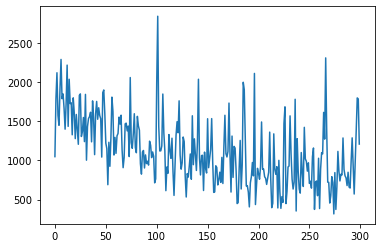

In [11]:
reward_plot(reward_10)

In [13]:
reward_1000 = [48.60116534075603, 47.82427408183706, 39.98692666227021, 39.464536021440345, 37.41622009167997, 46.4216457059959, 34.42454910463067, 44.93226075136983, 41.421123010650895, 44.17515649233532, 39.898942680267155, 44.41353029704107, 31.17670515619195, 34.671287289900164, 30.17427061750539, 37.174074176952914, 33.92162463733034, 33.65156570987266, 43.17344026390162, 34.43601902706153, 33.39261328235157, 36.42584325810544, 33.65669464507413, 50.16146488396826, 34.663287584955754, 33.67136701098794, 32.16203568273434, 32.89465651597883, 35.902193752943624, 39.65946737592702, 35.179016904508515, 39.16008256666947, 37.19742506143049, 38.16625500148019, 36.659232704269684, 29.907855388046883, 28.92605745690917, 28.86774876721377, 27.877565613176, 29.399472930818963, 34.194005361059546, 34.1503953170706, 31.634683618662603, 33.6394869489523, 25.906519748053483, 29.894937325031215, 25.408431701277713, 27.92867365783939, 20.63990237422045, 21.380570648071846, 23.90149475518663, 25.632165907366915, 27.144673284436124, 21.849660041392287, 18.105715277497435, 27.940298439644376, 19.84472145901209, 23.85444138497248, 28.39211497666813, 26.119726686796284, 18.384229682163905, 17.14542487808712, 20.395179697194042, 29.399378165667105, 27.61825384676351, 24.635282179094794, 16.623046838979942, 18.112101145356938, 25.381482328528858, 21.866839545640786, 21.930518593367832, 23.62386047070588, 29.43659996823229, 23.651595439265456, 19.367887668863766, 16.118955156914993, 20.879977498830854, 21.845953627236224, 16.375724486403296, 16.638228642902813, 21.412045405469545, 21.629866061005746, 20.13080122987241, 18.89450224367712, 26.866977643574177, 22.111855595056394, 18.3581623289871, 17.846406712484836, 16.830684639337086, 19.38199905253536, 16.84509106140386, 19.875377056182526, 16.35538206484612, 16.090519206461824, 15.350845143927465, 16.113162038384257, 19.873356843203524, 17.371027137693705, 13.116536680237488, 49.84429428107361, 13.605775749955983, 11.612814741227854, 53.582474736367296, 79.10630714454875, 66.8413837439739, 61.60400193089357, 66.10363400416607, 71.61639781412573, 76.84307441603113, 77.1087812142957, 78.84603407906522, 85.34067819298828, 74.10099203672704, 84.34165783642315, 67.84562716481943, 65.33555542335623, 65.11641366395833, 67.342164354582, 76.11353734809074, 74.09161538622445, 75.57843588623824, 68.81339610534812, 61.59708822278633, 62.35201230717417, 65.83618874652483, 70.83828484697216, 58.59903858276943, 66.59391237879964, 57.59039392097741, 76.83969159537921, 90.32801736736404, 82.10164147125008, 87.83879185396445, 46.33270594865178, 15.846818247570981, 9.597961015661888, 11.342518591766934, 50.073406243391545, 68.07586555173448, 64.84898050334644, 69.35171743078796, 65.8701388813217, 69.34663237665093, 63.582105273295596, 70.58969737428234, 65.08485999850666, 69.56678789641123, 68.57198443488281, 24.826158784981132, 7.581666580710426, 8.824374024398372, 7.554756772441223, 9.586282135092866, 6.823405601123628, 5.820990523373829, 4.577708695944444, 7.812069233813858, 9.072154176707937, 8.821149219152726, 8.573646513441792, 10.610023115284408, 14.841213777611081, 9.590111425931541, 8.59203838635708, 14.094182644618101, 9.314612774911389, 8.323012196480862, 4.572172780485873, 13.585953115750451, 7.326270525358739, 5.570082628809504, 7.3350552564206435, 11.081290952190853, 8.559003946896029, 13.336856011822684, 12.828647162230471, 8.07267361496291, 8.323711922595804, 5.052523356171223, 10.817645754950846, 10.08084899139052, 7.830342412946906, 2.3144324931550466, 8.061009706547418, 5.321759559836046, 6.063501866283789, 6.813068052065852, 8.575681310557174, 5.814926445205368, 8.831203506637616, 6.594390070869326, 9.574037034016241, 4.567957372010598, 4.062937396644057, 9.077881841736135, 3.064603490890418, 6.825457626042244, 6.5730940374326785, 6.309584252182001, 4.05665703234933, 6.818126680756963, 8.080089625450448, 4.824999668378226, 11.820847582042104, 7.3326856067701485, 8.0860688420724, 10.820854454828382, 5.582759597272028, 3.052385657411437, 6.0818904879881135, 6.559044948599925, 6.81490096551038, 5.313594969315933, 6.057111172985219, 5.837053129857794, 8.058248106234911, 4.319216046488852, 5.569296192639571, 3.0705880983863567, 4.3085369897258525, 3.813718001739793, 2.806303346432202, 6.819341978334337, 6.8139955988516325, 4.0614710279568085, 3.5626044921140703, 6.0645662938364, 5.305164330572235, 4.317123415268698, 6.056139186154224, 0.5494810223241042, 3.815920700389194, 4.053638074844459, 42.79349867734668, 2.8116870137943244, 2.304498150894324, 6.072364022006201, 5.560996440062143, 5.553961401298195, 3.046460893288017, 1.817566618746853, 5.808814458499158, 5.051527005419844, 1.0606644800873968, 4.294524965967967, 2.309294005133552, 1.3108461344434534, 6.5563885058347555, 3.315980845670949, 5.0671453208057, 2.8017402328608787, 3.305415486668303, 5.810593152808944, 1.044464892057929, 4.047401942723727, 5.31879643341875, 2.817198337542792, 4.552359202861656, 7.809485614638358, 10.081165413231483, 3.54638558882599, 4.566964398559586, 3.5509250400495906, 2.299434969579403, 10.473567188175656, 26.91513034249398, 26.89566358012377, 23.904870248794712, 28.900692252404802, 25.384506956339457, 27.380220024504037, 2.916758974412842, 2.0518020086128965, 4.801850745892625, 0.5483794531181777, 23.973009239399218, 18.66452664126105, 1.5520350245084444, 6.3037749253218385, 5.912216936492229, 36.2830442065434, 34.06354414783519, 23.88474904993772, 30.114515972530302, 26.159523250095866, 27.141478475044387, 26.886667261380577, 26.87961375606813, 29.394409202102395, 27.412080751319877, 20.005802712927398, 7.424964612583672, 8.31697628974767, 28.351824664437004, 2.5542084042445983, 1.043867546648111, 20.330866725242878, 26.846661904553503, 26.08692346147554, 25.840880626905697]

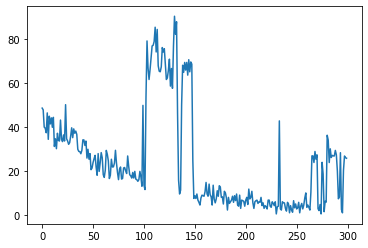

In [14]:
reward_plot(reward_1000)

In [15]:
rewards_der_10 = [16.45850622406639, 0.25, 0.75, 22.99199288256228, 0.75, 33.41701244813278, 14.006504524886877, -1, 7.378252262443438, 22.61134163208852, 3.945889894419306, 0.25, 35.35067873303167, 0.5, 2.4594174208144794, 18.675339366515836, 24.562759336099585, 3.1651119402985075, 0.5, 11.355203619909501, 3.6651119402985075, 2.2075559701492535, 5.3026018099547505, -1, 13.256504524886877, -1, 3.6438899253731343, 18.425339366515836, 11.783559577677224, 1.0, 8.837669683257918, 8.837669683257918, 1.8219449626865671, 65.08402489626556, 6.878252262443438, -1, 106.55203619909501, 6.878252262443438, 3.564126131221719, 0.75, 5.168834841628959, 17.675339366515836, 49.62551867219917, 5.3026018099547505, 12.033559577677224, 8.837669683257918, 48.87551867219917, 7.3201357466063355, 13.256504524886877, 0.25, 5.3026018099547505, 0.75, 9.337669683257918, 14.006504524886877, 14.006504524886877, 7.570135746606335, 18.425339366515836, 0.75, 18.425339366515836, 5.358519900497512, 4.143889925373134, 18.425339366515836, 18.425339366515836, 18.425339366515836, 18.425339366515836, 2.071944962686567, 27.263009049773753, 27.263009049773753, 27.263009049773753, 27.263009049773753, 1.9575559701492538, 0.75, 1.714629975124378, 48.41141331977631, 48.66141331977631, 27.263009049773753, 27.013009049773753, 33.16701244813278, 27.263009049773753, 5.800096961861668, 27.263009049773753, 27.263009049773753, 2.041111407249467, 27.263009049773753, 0.5, 0.75, 27.263009049773753, 98.25103734439834, 0.25, 1.0, 14.006504524886877, 14.006504524886877, 53.02601809954751, 7.378252262443438, 0.25, 7.378252262443438, 7.378252262443438, 7.628252262443438, 6.0526018099547505, 27.513009049773753, 9.587669683257918, 17.675339366515836, 48.87551867219917, 10.605203619909501, 10.605203619909501, 10.605203619909501, 1.0, 10.605203619909501, 2.4575559701492535, 21.210407239819002, 21.210407239819002, -1, 21.210407239819002, 1.464629975124378, 26.513009049773753, 26.513009049773753, 20.450207468879672, 5.418834841628959, 21.210407239819002, 21.210407239819002, 21.210407239819002, 21.210407239819002, 21.210407239819002, 21.210407239819002, 21.210407239819002, 334.37989323843414, 26.513009049773753, 53.02601809954751, 1.714629975124378, 7.378252262443438, 7.378252262443438, 7.378252262443438, 7.378252262443438, 7.378252262443438, 7.378252262443438, 7.378252262443438, 7.378252262443438, 0.5, 7.378252262443438, 7.378252262443438, 7.378252262443438, 7.378252262443438, 7.128252262443438, 13.256504524886877, 3.814126131221719, 13.256504524886877, 13.256504524886877, 98.00103734439834, 13.256504524886877, 13.256504524886877, 13.256504524886877, 13.256504524886877, 17.925339366515836, 13.756504524886877, 8.837669683257918, 8.837669683257918, -1, 8.837669683257918, 9.337669683257918, 8.837669683257918, 8.837669683257918, 8.837669683257918, 8.837669683257918, 8.837669683257918, 8.287779850746269, 17.675339366515836, 38.900414937759344, 9.087669683257918, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 0.5, 4.668834841628959, 4.668834841628959, 4.668834841628959, 7.3201357466063355, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 0.5, 13.506504524886877, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 35.85067873303167, 11.783559577677224, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 33.362989323843415, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 18.784994068801893, -1, 9.087669683257918, 4.03757272139625, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 0.25, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918]

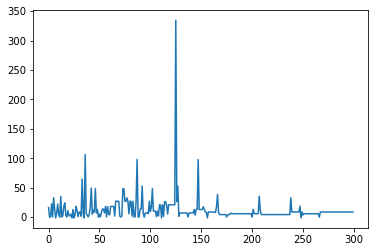

In [16]:
reward_plot(rewards_der_10)

In [17]:
reward = [22.99199288256228, -1, 0.75, 0.0, 54.02601809954751, 8.837669683257918, -1, 16.95850622406639, 0.25, -1, 16.70850622406639, -1, 41.95373665480427, 24.812759336099585, 111.45996441281137, 13.506504524886877, 27.013009049773753, 0.75, 0.25, 0.5, 6.391779788838612, 53.02601809954751, 5.418834841628959, 18.175339366515836, 0.25, 32.91701244813278, 4.668834841628959, 32.91701244813278, 4.143889925373134, 48.28234850915108, 25.062759336099585, -1, 13.466804979253112, 0.5, 37.86821266968325, 2.929259950248756, 5.143889925373134, 38.62554683539551, 27.013009049773753, 2.929259950248756, 747.910145671767, 65.58402489626556, 5.358519900497512, 13.506504524886877, 9.337669683257918, 64.83402489626556, 7.378252262443438, 48.62551867219917, 17.675339366515836, 27.263009049773753, 6.3026018099547505, 15.075559701492537, 4.143889925373134, 14.006504524886877, -1, 6.878252262443438, 20.450207468879672, 4.143889925373134, 1.0, 1.964629975124378, 321.3412956086799, 3.4151119402985075, 21.210407239819002, 3.4151119402985075, 26.513009049773753, 65.58402489626556, 20.200207468879672, 3.4151119402985075, 3.4151119402985075, 97.25103734439834, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 3.314126131221719, 2.2094174208144794, 17.70850622406639, 4.143889925373134, 2.2094174208144794, 113.96875265124618, 21.61134163208852, 21.61134163208852, 21.61134163208852, 1.0, 5.108519900497512, 30.34226026893541, 1.9575559701492538, 1.9575559701492538, 4.668834841628959, 788.195883422797, 318.2311328218348, 2.929259950248756, 2.929259950248756, 2.571944962686567, 1548.7543353797607, 1.9575559701492538, 1.9575559701492538, 1.9575559701492538, 1.9575559701492538, -1, 1.9575559701492538, 1.9575559701492538, 1.9575559701492538, 1.9575559701492538, 21.960407239819002, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 56.35498220640569, 33.41701244813278, 14.393005334914049, 0.5, 54.02601809954751, 2.929259950248756, 2.929259950248756, 9.087669683257918, 16.95850622406639, 2.929259950248756, 18.675339366515836, 14.575559701492537, 2.321944962686567, 67.22597864768683, 1.714629975124378, 4.668834841628959, 1.541111407249467, 1.541111407249467, 7.8251454427925005, 1.4109724813432836, 1.4109724813432836, 8.287779850746269, 189.63141414400124, -1, 1.541111407249467, 1.541111407249467, 1.541111407249467, 1.541111407249467, 1.541111407249467, 1.541111407249467, 1.541111407249467, 1.541111407249467, 23.830706659888154, 1.4109724813432836, 1.9109724813432836, 1122.5715457567528, 568.2307062765839, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 4.418834841628959, 6.141779788838612, 2.321944962686567, 2.321944962686567, 2.321944962686567, 2.321944962686567, 3.179259950248756, 1362.5560669437775, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 8.354253112033195, 12.966804979253114, 0.25, 9.725103734439836, 9.725103734439836, 0.5, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 6.878252262443438, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 11.105203619909501, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 9.725103734439836, 9.725103734439836, 9.725103734439836, 9.725103734439836, 9.725103734439836, 9.725103734439836, 9.725103734439836, 0.5, 12.966804979253114, 12.966804979253114, 0.25, 0.5, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 9.104253112033195, 16.20850622406639, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 3.429259950248756, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 7.378252262443438, 4.668834841628959, 24.312759336099585, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 1.0, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 10.855203619909501]

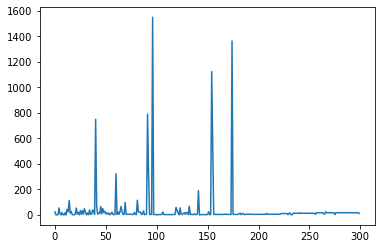

In [18]:
reward_plot(reward)

In [22]:
r = [1476.1368597970204, 1592.784408381564, 2510.847004074109, 1058.275859705276, 2073.2667384230353, 1872.790670098735, 1404.5089476445967, 1292.7391214678632, 1426.441426649999, 2060.1752235449485, 1504.7412451662763, 1562.5464845644954, 1358.3690545130303, 1274.923242878371, 1684.9487567904514, 1766.5157368337093, 1995.0948892816182, 1644.4781366865357, 1709.0227109064817, 1382.5726574598405, 1337.4935887178563, 1363.6144506540122, 978.0760748362864, 1908.8305046200524, 2102.8647864906393, 2082.4120779926966, 1847.721111722014, 1199.570460766135, 1534.6366638122129, 1025.5915530137659, 1596.4794489154444, 1016.3278210215483, 1254.612074335954, 1360.5174730076928, 1552.8293232770534, 1719.4417799643536, 1564.8070171701586, 1411.3760692821616, 899.6890902087528, 909.2499879432081, 687.271381387441, 622.3238554942103, 817.5151214721421, 1609.065676751028, 1498.6573181236497, 1172.2028471991066, 859.0987034215024, 1291.760594484764, 1228.2384499907005, 980.2441077587272, 1660.1145224940503, 1069.2320868979073, 1311.0599257152035, 620.0395824495356, 1197.8462337849398, 1198.9983511087614, 773.5899019096114, 1151.7324146436918, 729.9926589934447, 925.0019949289855, 986.7415525566607, 1006.1744279290592, 1176.3498275946615, 947.3647731653654, 989.6817197718623, 689.6566806502145, 866.6119575760162, 1004.9465987221203, 794.616745062257, 604.7487204980956, 564.782268918736, 1070.630231503132, 1401.5295620852232, 630.4540407104655, 670.8467850879794, 1424.3949807897081, 967.9689696937215, 775.8470347298281, 952.2563872477319, 392.21206541538504, 422.56390507946713, 534.5134995422438, 728.5054578653236, 738.704801912474, 990.2087866250682, 639.2424084286367, 695.0173981942581, 332.12986013378185, 783.792107669234, 691.8139107869804, 509.8085871897809, 452.45720105345066, 631.260061984655, 711.050159078727, 960.1526947186328, 288.5397919086869, 1054.1065806374115, 266.0446105922063, 779.8252113200516, 355.7165612419388, 202.8297210316388, 640.5872083029151, 329.8182016276162, 416.0924514278609, 472.319673626637, 660.5460719912115, 423.04148357816035, 974.6277972214681, 595.3870556555413, 639.6394626694428, 667.095640205129, 681.8099715069826, 373.39888533948346, 741.1553984609307, 663.1622238954432, 383.85233984056134, 495.7151142002849, 625.8354690258252, 296.2188853588448, 413.8915355722616, 677.7380391049805, 486.64326683699386, 797.7198807483684, 260.6214059973948, 299.09322835399723, 459.04733802766145, 291.18092113045645, 527.698478295858, 648.4014529846615, 791.91503752487, 698.6875713872005, 431.8191208979865, 111.93524016391692, 200.65338283039412, 498.71523469863274, 251.59126034333596, 620.2019024739542, 344.03875575162056, 155.66916634018528, 199.3644325510877, 373.3930433572864, 807.7455058988999, 284.0153215359788, 379.8385659420916, 432.9979234016948, 266.9709542996921, 602.6410469364477, 433.06479238361965, 388.54505144471347, 554.5185215206857, 296.62465305370284, 415.0498785707881, 221.56753612423972, 513.9858930400482, 320.13066802302853, 584.522935215382, 521.4905276979802, 673.3681222566189, 357.451078870622, 211.32762740057382, 91.2660505450377, 459.8498170610747, 215.69322227426912, 221.39939519663903, 416.94778911099576, 258.606954235516, 445.92343457632137, 636.3216288312963, 32.05170344544246, 87.42373561483112, 548.2833419206986, 286.1225891027471, 353.5730958115092, 195.3103080510815, 264.57706816608436, 311.5849021790449, 191.40739210036708, 186.27996404854727, 389.7251912918892, 181.20540271597642, 106.00910974436512, -40.89456478183692, 111.41859045506462, 201.88642079465825, 233.23462054565104, 262.4573717298892, 14.708332864335937, 169.1639679388865, 223.4021144011512, 339.41232122667213, 148.39686490520654, 84.38997937835137, 207.20702628135564, 358.00248524444675, 350.9344498881606, 311.5426937208933, 126.56738636662087, 25.264165597352594, 58.04580902754327, 239.65753904266572, 536.5553800637085, 273.86312154477656, 26.87307593818238, 270.37623894608464, 28.78182387693883, -38.2841016214178, -3.741786858974365, 514.8833040128178, 89.83474452314569, 219.2501536836774, 6.840505710512293, 46.20003544729998, 79.17023402627562, 37.81917846429616, 251.5329496105063, 257.49100348164967, 223.0979898739006, -52.737932228000275, 193.93675415988753, 107.34502083638179, 3.2414215686274446, 180.35374552062729, 762.2486803361967, 1659.0107143884447, 109.65567235490548, 412.8422081509461, 365.20330417750296, 117.73921039741839, 2138.15118660125, 221.2651512099759, 62.958737166363036, 4812.6463507374965, 5054.276236508756, 5741.658229688332, 1476.3163317080944, 4325.363894377164, 1651.0550370759872, 2475.773139524788, 783.774341636254, 152.06451080711864, 3969.893520717732, 5223.061116183096, 4335.708949548236, 264.85734968418996, 4692.977953726897, 1626.3361069990135, 2080.7972082561146, 11756.267659629533, 8332.469380781866, 6767.927554707473, 10593.460037468225, 16589.80386011713, 6590.2546256528485, 5273.611379002992, 4378.223884821632, 3282.8523824413433, 1647.9856106256489, 1826.5904250658687, 6070.613924316615, 4815.290795368871, 237.57633337132222, 1337.2823043356846, 1442.5494473330384, 303.3319164143578, 2505.38143864184, 8421.01687552227, 5316.469945196101, 3284.3827325444545, 1792.281771623227, 2416.7086995809473, 3028.5411945860237, 6088.164269392122, 6257.783402821514, 13521.147127945307, 12251.215626938449, 463.3498861385669, 1121.2811389536898, 586.7148043958391, 625.2027586667168, 4208.790624495071, 1190.855513291696, 331.05975953096515, 1649.2783468522211, 1638.7497500105237, 2709.812120812684, 471.9889344435692, 1258.9705434716332, 698.8790422711361, 139.20301138538088, 156.24956198574444, 3016.6526533533784, 1204.697541962363, 794.2902786564678, 297.2566318970876, 683.9977688017236, 245.45082128479024, 189.56144792159142, 216.02142989802152, 219.69095610043695, 766.9560496697055]

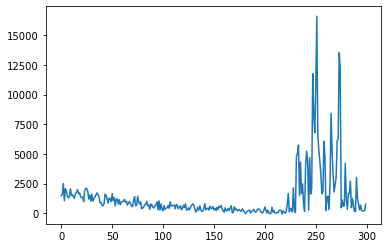

In [23]:
reward_plot(r)

In [6]:
r2 = [62.819772131351414, 54.67480222103473, 64.60874460687326, 73.00156071995191, 69.05894399615325, 68.67301599157425, 65.28322343919642, 68.78854313602436, 63.927386890407355, 61.553789017746965, 60.442218014334514, 71.20526316972065, 62.383458132203664, 79.89952670723014, 59.37004881102528, 65.93970588157781, 60.910412576244426, 66.96484312506772, 71.11751610737646, 61.50398040278171, 67.39470618077598, 66.35377502851613, 61.00417629156587, 66.30102672779142, 56.08890451624201, 61.87935618158414, 56.932578651975035, 68.98687541020037, 57.413619600298546, 67.91243522710421, 60.51533614281036, 64.95792252400226, 58.60045313611732, 66.06136639371772, 66.91441062690194, 68.81149213589744, 52.08412207615375, 73.05377726429813, 62.87417492848416, 56.04075878842679, 59.00200864903571, 74.47097577469845, 71.74441092020824, 67.79627955988254, 66.01183906764741, 76.82803698847809, 65.23445869274471, 57.5966386233081, 58.08808891574857, 65.40613627857327, 67.42026327499528, 59.39600309737214, 69.65860595784262, 65.67174651396326, 55.68567052128746, 54.70198364684474, 59.28125452742205, 59.79130473852242, 65.7709775337806, 58.813037581026435, 64.62456219318102, 57.595539754034576, 67.8973866078286, 65.81934471146158, 62.247866093180996, 66.99502430855009, 61.36372504396484, 61.85542303396755, 65.86472706063232, 55.39612599947365, 63.29961452521397, 68.74398959365467, 70.96197361064715, 75.9080756533084, 70.15264051638023, 66.42985672953385, 69.08802310819367, 66.84944837646948, 63.93030138849804, 53.92703454267878, 64.56838767963619, 65.40760587390368, 65.05901367405158, 63.00857288450418, 67.22928017175892, 70.77328812066763, 70.41020676429137, 63.42147258225577, 65.73443860526224, 73.02174002999008, 59.157846923397365, 63.573317064628505, 68.0663201561682, 64.22533520775416, 68.70938215173649, 61.12976653603111, 64.00585528595481, 64.77642154700908, 70.82089978770685, 66.46197579948397, 67.39583192845728, 63.360512233545315, 70.42200591830388, 68.0259028913357, 63.51613718229723, 61.26463596224459, 70.69696741594778, 69.37040293035838, 59.331475850788955, 55.23928036088729, 67.44931117963858, 63.72512001502208, 63.03416015115707, 58.21722089391311, 63.76232787688483, 63.94526414285232, 67.25121587138891, 60.10967473654053, 68.42587743351328, 63.57999332630322, 61.74149404899607, 65.8408375729688, 67.47861508590975, 65.79028338526852, 67.32702335522293, 67.37769269068048, 77.1800513438098, 79.78969550800318, 74.21712120106422, 69.79415380866999, 77.27877082789102, 74.89444991976943, 75.88527782000389, 73.90693609787154, 68.82577986245532, 67.64326138779505, 68.07340017597508, 71.71447279943948, 71.3420742890704, 70.21097636154335, 61.90788057447836, 64.7841528542622, 64.79796393047765, 67.06200178438472, 65.78825676480233, 66.08803989732071, 69.28343419058687, 68.57362832168043, 72.20844958772624, 72.8461698875399, 67.48472913104305, 69.38408453628269, 72.91141898659068, 72.30529858213092, 81.77188839257872, 73.54119274115467, 67.56026859780997, 61.89154969518089, 65.40284872276219, 65.35607706943304, 66.6207846215878, 66.78405578119065, 67.84818228835393, 67.40803492601282, 69.33180660542214, 68.0786232937931, 73.69556884598529, 63.902354766735286, 69.88249755927706, 72.88663077743712, 67.82698066102034, 65.4336067127198, 68.3152158571322, 69.06696630691363, 77.51686582178291, 73.55130272738198, 73.89204063355282, 62.96290591391438, 63.06765637154877, 63.16673507472375, 62.08184173453236, 60.1848131037704, 59.60698372153716, 56.4002191837369, 60.38384264484872, 60.03103140303044, 60.61553452688539, 64.16948359303825, 60.97476780483139, 59.98318356969706, 68.18304088138368, 61.493272690334905, 59.638948329002346, 61.4639255021036, 55.360670060252566, 70.51535539943633, 63.41282353186036, 64.34224443232809, 65.25378364445537, 72.27356582090653, 69.31670309617358, 71.58574544733303, 69.24318263045897, 72.71461979296846, 72.18043898352842, 82.46224948979783, 84.20131496365343, 80.94843280015677, 66.2915222292168, 70.03873088081042, 67.99210548951335, 64.1554403210324, 60.27221448641291, 67.41790552562175, 63.05409104042008, 62.64240507500978, 61.64195735421596, 65.54350091024105, 63.88874340023118, 65.5346922657507, 65.78867802682454, 66.97428898616398, 62.652177765313375, 65.01237765005693, 65.45296352745443, 65.63046565376368, 63.655662427629395, 65.7313802760748, 63.97350556932053, 63.26267319156477, 63.99970019957178, 75.11881629351598, 71.74145252780758, 70.52097569013785, 77.80413679059411, 75.4570369409739, 82.18502729940825, 78.40789519391745, 75.52861134386977, 85.4075664468579, 81.1691154089623, 78.7289783465042, 77.07110025716237, 79.30413035418023, 76.03970706023037, 73.34320539852806, 72.99180452838067, 74.53726083762695, 73.8584301428317, 72.91776767322956, 75.78977929164957, 68.64564859579168, 66.45724284548058, 68.62310560641473, 66.12923963268145, 67.46694365568815, 64.5374450999907, 62.392628237963514, 64.55026967130505, 64.4212591893714, 58.83048586304355, 64.26270546572839, 60.30202779556011, 63.40340140706909, 65.96245600894258, 70.50384171195087, 68.19781275287335, 67.03408258917041, 67.48877986016313, 69.01975816104418, 71.72721595907117, 70.81196259629336, 71.80146910227168, 75.41082907827315, 72.55330797885853, 72.25737250445191, 75.41466589752824, 73.11585508496472, 72.20162907388344, 74.93661160876646, 68.62068663887028, 68.18944470876758, 67.29943721831705, 68.07192439105978, 69.0643133016683, 70.46686516719296, 71.82482295566038, 68.96241829778684, 66.64447619821291, 65.90044597810515, 63.08582215593292, 62.660020341430645, 64.60562100183297, 67.04284017193292, 69.84506328860803, 68.62931509437684, 68.38319758455069, 70.45506367291983, 69.14096788708606, 71.36024930125221]

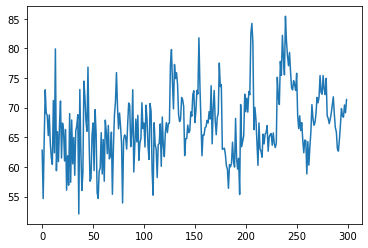

In [7]:
reward_plot(r2)

In [8]:
r3 = [42.06481863553306, 47.859112803489474, 43.27043470647823, 45.73138570295157, 35.688952010762314, 34.42904692459401, 39.437176553821836, 37.90411949262554, 40.938064714819085, 51.45378360546026, 43.67569764719077, 39.17543550759977, 35.434933623351064, 29.188450190315233, 36.447753454831314, 37.42935614764741, 38.69973944415795, 35.22070458371011, 29.472313875333384, 34.969074613575884, 31.712866745044966, 36.4625069461423, 33.9852925463733, 30.242729922640997, 19.484006603767657, 32.21563602724327, 44.016442759116096, 32.0786700866582, 32.475937922887205, 37.54136028119739, 34.29702396038159, 40.06539859244214, 30.579824605671064, 28.302242001700836, 31.82434528975896, 22.86520154320733, 28.326970120227838, 27.06194183604979, 28.637335704119558, 30.58471766630376, 27.916186207413894, 32.6053594361525, 30.1191735006043, 21.65153589173468, 30.107386942309898, 23.443774531200788, 22.922566259585054, 26.943091701778854, 20.44784766693485, 28.713885708376367, 28.541957186230732, 24.863798399678963, 16.71702216595355, 27.91444805808145, 25.980797237205646, 31.759555794206815, 27.484279395923792, 27.246974529132125, 17.710275074319558, 29.00487229093845, 29.952374654355662, 19.677313758065257, 23.207543758313413, 22.989823870877935, 23.986060561346704, 27.424000634808582, 31.159780866877295, 14.246783163478625, 20.23661400911148, 23.782712854801474, 14.522158950958362, 21.46394586345542, 19.689191178188533, 15.535282783047773, 15.069395483837244, 18.00979259922233, 17.500473682420804, 21.965927982456016, 18.789382274264884, 10.223587075969194, 18.963423056230077, 30.971725854555395, 23.27731651037693, 19.512973676187855, 21.750543722107547, 19.003682937698517, 11.11334665403028, 20.252663199564246, 30.172643312508573, 30.71048431953085, 24.672834932250765, 29.166173475788806, 39.4252481326951, 32.41735806790951, 32.9260829262999, 23.405040527678548, 36.681307544731446, 23.177230115051927, 45.659703123910354, 45.654454868653545, 18.371601307489627, 18.856413887546847, 38.49564753984338, 42.893182807390815, 47.162307438584286, 49.374329368610816, 46.37614872048384, 49.41384415264789, 45.39087774525887, 48.59058979478929, 47.13550717222861, 22.35667807176675, 43.19995721305444, 45.11350901269665, 51.134689333670536, 43.35994758791145, 50.3570260262081, 47.38137020874817, 50.36140642871532, 48.622049686226035, 51.13382755595263, 56.38815700216773, 50.115750421697015, 47.375082310856996, 44.62887346402865, 41.36068682171024, 44.61283290224748, 46.37812841464224, 46.39732146220191, 51.10675705413244, 43.107517593509044, 44.6110731200342, 42.128110635616366, 48.36726371442963, 50.12394265331304, 47.87469797008461, 52.638255880471974, 48.61066042870661, 44.60827501929864, 48.84608008955875, 45.138673306735626, 46.843888576492475, 49.34534156326654, 50.63973026289149, 15.127449074276088, 6.873859341736106, 12.117513197828375, 5.375241010586072, 10.363643646297469, 8.111496702367809, 7.875842231763883, 10.87738323932192, 10.867025699429085, 5.87347276672584, 5.12942115388336, 9.608619448889014, 10.886089780547243, 5.103430342848404, 9.372381097938778, 10.366535597666315, 13.368368032100472, 12.908490419079873, 8.363960769168898, 4.879298778872911, 8.141076394672385, 13.878269569968136, 6.361738286358219, 10.88429193848759, 8.861804167357835, 7.365890808591437, 5.375731562989185, 17.11239015582928, 5.620294746534293, 3.6034108869357784, 12.37213111866587, 8.126766584149959, 6.385618148628169, 8.13018424654466, 8.628894904245206, 5.605229802319986, 1.1043843744488064, 21.670329211960382, 16.64881978052076, 18.142902099218738, 42.36953749432349, 47.597503038742815, 50.0967820335148, 48.340187445530425, 43.33788813980971, 10.357527644068037, 4.611395109871926, 7.60477628547019, 9.862861128374199, 3.5945261772716557, 2.5915986195629688, 9.621524801341403, 6.3531670187334415, 6.344649655077273, 6.834055931257164, 1.6007885854371708, 7.352568724576779, 13.633756616984826, 26.421472224847992, 28.695737704316244, 27.43188205603476, 27.431800969050006, 29.205765061533636, 26.93054995915736, 27.9384406601115, 30.676206885809574, 30.44516792251431, 29.4347047260097, 26.93819681101465, 26.681525194863713, 26.690243191220038, 27.678775252363092, 26.944271851750955, 25.185157952340056, 17.22093735575172, 23.082852781640092, 7.666228635434187, 3.782796142671654, 2.0472643588280564, 7.5048923143318405, 6.5021413582917145, 6.277261293476399, 5.790254977526598, 4.734255431407863, 4.7813980416284, 4.782066379842042, 18.18205330590699, 5.9617471711825525, 4.2575243459212615, 3.783224428382272, 6.027698923182236, 6.272614241144677, 4.77216557751079, 10.235048409653421, 11.240805686152292, 5.831553206623922, 3.79982156304567, 4.791275664366255, 3.795141448438084, 4.566577953561575, 1.599029423966418, 13.058958507065974, 7.554207584713926, 3.3556270507176578, 2.5866815017922917, 5.312346033724918, 8.043165139001122, 6.548921720777775, 4.058585130009044, 5.0300013442785, 4.7854546914849205, 4.547239253201224, 2.5731141245290816, 3.8157824909611047, 1.8197206379125046, 5.041835316786381, 2.08143806427692, 3.082994040645361, 3.30079187044909, 3.0407298049971354, 6.7312197182525, 2.0247295274774157, 4.288018287015364, 4.047282345723502, 3.259584919442292, 2.2852232038702502, 4.554244819424899, 5.752031762301157, 5.031048305168527, 4.799514265016691, 1.9952509958108058, 4.764759015915798, 2.537602714238781, 2.775658993275949, 5.25922264258892, 3.267502494562522, 5.745166152883646, 3.5153912550744697, 4.528463898877776, 8.462742589344739, 3.2449755473674378, 3.9852018773991205, 3.461831714013467, 2.7697906172290265, 3.4995978741864886, 2.9994412802485297, 3.4999681202839876, 4.759650536444652, 2.754732809628482, 2.266496839149836, 2.001195883869529, 4.23729872276753, 0.5079657084759308, 3.980031270848934, 3.0129042356921496, 3.748201315396589]



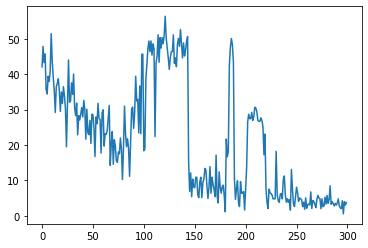

In [9]:
reward_plot(r3)

In [46]:
ac = [[7, 0, 0], [7, 0, 1], [7, 0, 2], [7, 1, 0], [7, 1, 1], [7, 1, 2], [7, 2, 0], [7, 2, 1], [7, 2, 2], [7, 3, 0], [7, 3, 1], [7, 3, 2], [7, 4, 0], [7, 4, 1], [7, 4, 2], [8, 0, 0], [8, 0, 1], [8, 0, 2], [8, 1, 0], [8, 1, 1], [8, 1, 2], [8, 2, 0], [8, 2, 1], [8, 2, 2], [8, 3, 0], [8, 3, 1], [8, 3, 2], [8, 4, 0], [8, 4, 1], [8, 4, 2], [9, 0, 0], [9, 0, 1], [9, 0, 2], [9, 1, 0], [9, 1, 1], [9, 1, 2], [9, 2, 0], [9, 2, 1], [9, 2, 2], [9, 3, 0], [9, 3, 1], [9, 3, 2], [9, 4, 0], [9, 4, 1], [9, 4, 2], [10, 0, 0], [10, 0, 1], [10, 0, 2], [10, 1, 0], [10, 1, 1], [10, 1, 2], [10, 2, 0], [10, 2, 1], [10, 2, 2], [10, 3, 0], [10, 3, 1], [10, 3, 2], [10, 4, 0], [10, 4, 1], [10, 4, 2], [11, 0, 0], [11, 0, 1], [11, 0, 2], [11, 1, 0], [11, 1, 1], [11, 1, 2], [11, 2, 0], [11, 2, 1], [11, 2, 2], [11, 3, 0], [11, 3, 1], [11, 3, 2], [11, 4, 0], [11, 4, 1], [11, 4, 2], [12, 0, 0], [12, 0, 1], [12, 0, 2], [12, 1, 0], [12, 1, 1], [12, 1, 2], [12, 2, 0], [12, 2, 1], [12, 2, 2], [12, 3, 0], [12, 3, 1], [12, 3, 2], [12, 4, 0], [12, 4, 1], [12, 4, 2]]

In [51]:
r4 = [45.533732196558134, 35.86946684150438, 48.79111819053176, 36.22057181423254, 35.43258141851872, 41.173098540646116, 38.91437177016065, 36.6718025416381, 33.3909628639711, 35.422523537064606, 37.170709525603144, 39.66684127746749, 43.677128784109314, 43.90238410470303, 35.16209115077435, 31.18660376917245, 39.15836313737809, 34.91410320369904, 38.41058977216405, 34.891883842042304, 51.713092067022245, 35.21915255395523, 39.70504319308107, 48.67237068778332, 45.17674704613612, 42.414772203704885, 40.919629192615965, 45.41151760125165, 33.92648857840417, 41.96144105493026, 49.96756730906166, 35.95681558366595, 35.4347777490991, 54.92594803453352, 42.17632608712124, 46.24339696491232, 38.994008826743375, 38.21075221185863, 45.44130046887796, 34.44081989518718, 41.00023590331502, 31.78841194414877, 42.01010529700769, 54.23667219712483, 53.62199319553231, 59.45736748458455, 59.40030590985829, 56.93628617426264, 35.713850868287324, 53.727803476534376, 39.668789712232844, 42.48398525478524, 56.20454624260334, 61.72516742740432, 50.67464493230191, 36.716474212120666, 23.5111902916504, 28.989584096530443, 25.060690284178154, 7.310034513425563, 13.530109427947757, 18.540158835366782, 33.460360533791295, 36.41186664669321, 43.63440958913522, 54.90104086462062, 34.67123943855982, 42.88519145545309, 58.91980541684313, 60.9196086248273, 36.419881487242925, 13.767590312889567, 29.179947151109953, 40.22036359968967, 46.717567876797396, 54.94010705135145, 63.91512390989541, 60.447612924069766, 36.26676009150197, 67.81140560926244, 49.6389053758867, 46.20891263072077, 39.46255320193417, 33.74183585054824, 43.28270169046835, 49.46198383979041, 42.92955563251125, 47.86880386647499, 18.654023264034112, 19.94483610494676, 38.76960185636363, 42.00657511190975, 45.00687415256361, 45.44619037104409, 38.7245530452515, 49.14449194625798, 70.85200156336893, 56.906658078102915, 62.90726400589903, 32.340484430885404, 68.1361001212891, 68.90529361327636, 65.95807322521455, 58.67746848467051, 51.20790575734382, 66.47910317860163, 55.51173905261242, 55.949079945220035, 69.69889842397619, 54.24111656300927, 36.07764043234038, 44.176697208432536, 46.67772724489927, 50.68726205147906, 42.97067372037209, 49.123527490891604, 56.78227926550637, 47.92096382136655, 41.35657779218238, 32.51252313439704, 52.46703202343445, 46.99967726424409, 24.777773285786626, 59.64321719305341, 44.620289236948665, 52.10794957840136, 19.95787195468643, 32.49828746823665, 56.181436905645874, 49.44174295191475, 48.89316455184626, 59.93955647754987, 65.8939599952367, 62.622018076758415, 39.50020800234579, 42.58041390291289, 49.27118926510117, 63.413600969670355, 51.374364746056585, 36.79523319209578, -0.8558413874750348, 56.37704629392959, 9.779542682875457, 34.89078576737323, 38.86500873328195, 51.64350844191553, 20.928865385552463, 56.74167722028927, 69.35680665192996, 23.446503505861543, 22.525566228912737, 16.721760014473414, 10.657644855130663, 30.61341187736882, 51.701479026322446, 49.720650946891126, 56.82655073967066, 42.12617477555476, 60.214283509774546, 78.72510546111192, 66.81564276681286, 63.62808325959332, 63.954532285805556, 64.26972181928855, 65.85879240227703, 44.36327126812133, 17.889997878460186, 51.38225088271731, 58.700874653931834, 84.63826303209704, 70.76638083903546, 82.3573168136884, 67.78901222447776, 79.22620563247084, 72.36891944230881, 70.7728828235222, 77.6010014964094, 53.70182410648975, 51.928052385781314, 83.41791703792377, 61.763603722422886, 81.22611695270957, 72.46406608509827, 57.9835025253557, 70.03228818618436, 63.40953775640114, 62.70177603947856, 70.69191734214378, 71.58171378923095, 76.12971234586281, 78.42745336210112, 81.45480536956397, 77.71295882241071, 74.64265039931126, 71.82855636558372, 80.08139777635671, 75.08888881332699, 66.98012922528011, 71.07044924173412, 54.55199269223523, 74.05926804548712, 76.26347940324594, 83.86551471275658, 68.68740743612062, 63.40886738024577, 61.37836697839489, 67.8314099348063, 35.79625195172742, 41.906679253272486, 54.83887279116913, 70.47179697273417, 74.33777992633495, 72.97523608066521, 55.824695450608765, 75.68947421871106, 56.34714691569789, 61.441452710303906, 60.67544963533751, 75.9646562339922, 73.84291342273545, 73.87265350082882, 82.24873152841285, 71.59624495405814, 61.62931421081364, 24.131301059492117, 42.8973750634869, 63.86568480967542, 59.39055847126935, 50.61910353446658, 58.48714557302202, 56.69004353929943, 57.95085918728535, 65.36286269082031, 71.84294798915305, 64.63759691735268, 65.34836335296966, 82.74837911377983, 83.44799109036568, 84.21895498990501, 85.82143884724798, 70.47029592619351, 72.28952911642457, 76.32369186083746, 69.81900666215745, 85.40950199888869, 85.92740001475583, 64.66134099622917, 83.66708881629103, 45.00073835618973, 60.048750988696256, 50.24793017156449, 59.6105178872704, 69.88959813760928, 87.59513261420383, 59.476605970769924, 49.588166279067714, 56.440251362184604, 45.0908299571291, 69.06396624298763, 62.698923995659335, 88.57310579366354, 45.11814955342374, 35.61059716153249, 57.70907463948866, 60.691274930488696, 47.61494741519167, 41.81232528800506, 48.5204829975104, 55.765657200332775, 68.11450971237576, 66.82333207070972, 81.68626473347315, 83.88253658566131, 36.91116656287652, 42.2006596904486, 40.421663808184526, 36.18053659390669, 60.32399083720127, 78.61045132834148, 72.72428712243406, 85.52871838516795, 78.99280714876414, 59.09413077605239, 81.93186703894054, 88.59010987579508, 78.31925876340466, 49.42684372075402, 58.48513497723375, 67.89374413405254, 51.95542171582523, 68.09322645804912, 54.48359604073997, 62.403959411990584, 76.17045752161965, 84.8989234985828, 65.56214871402474, 47.17872878469379, 64.23253804719229, 84.84852258497595, 63.41054304432072]

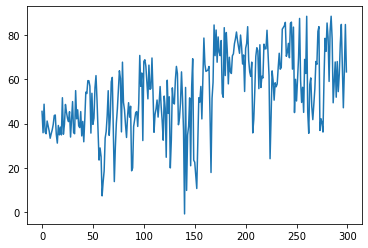

In [52]:
reward_plot(r4)